#crime on social media



In [ ]:

import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [1]:

file="whatsapp.txt"
key="12hr"
split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }

In [3]:

with open(file, 'r', encoding='utf-8') as raw_data:

    raw_string = ' '.join(raw_data.read().split('\n')) 

    user_msg = re.split(split_formats[key], raw_string) [1:] 

    date_time = re.findall(split_formats[key], raw_string) 

    df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg})

NameError: name 're' is not defined

In [ ]:

df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    

usernames = []
msgs = []
for i in df['user_msg']:
    a = re.split('([\w\W]+?):\s', i)
    if(a[1:]):
        usernames.append(a[1])
        msgs.append(a[2])
    else:
        usernames.append("group_notification")
        msgs.append(a[0])

df['user'] = usernames
df['message'] = msgs

df.drop('user_msg', axis=1, inplace=True)   
df    

In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


In [36]:

df.sample(10)

,date_time,user,message
9916,2020-08-13 15:01:00,"Darshan Rander (TSEC, IT)",Mene 12 ke exams mein start kiya directly with...
9891,2020-08-13 14:45:00,"Darshan Rander (TSEC, IT)",Yes
8372,2020-07-01 17:49:00,"Tanay Kamath (TSEC, CS)",Oof sorry code deka nahi tik se
4490,2020-04-11 13:16:00,+91 97027 35002,Haa I solved it
9677,2020-08-11 21:34:00,"Kartik Soneji (TSEC, CS)","Even if they don't save to cloud, you can usua..."
876,2020-02-14 21:11:00,"Kartik Soneji (TSEC, CS)","Yes, you are right. I fixed the code."
10062,2020-08-16 00:03:00,+91 98191 73361,@919920275655 main sponsor
2359,2020-02-28 01:13:00,"Tanay Kamath (TSEC, CS)",This message was deleted
10950,2020-08-27 22:16:00,"Darshan Rander (TSEC, IT)",Chilla ke sabko bata de😂🤦‍♂️
9946,2020-08-13 18:21:00,"Harsh Kapadia (TSEC IT, SE)",<Media omitted>


In [12]:

df[df['message'] == ""].shape[0]

538

In [13]:

df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [14]:
df

,date_time,user,message,day,month,year,date
0,2020-01-26 16:19:00,group_notification,Messages and calls are end-to-end encrypted. N...,Sun,Jan,2020,2020-01-26
1,2020-01-24 20:25:00,group_notification,"Tanay Kamath (TSEC, CS) created group ""CODERS👨...",Fri,Jan,2020,2020-01-24
2,2020-01-26 16:19:00,group_notification,You joined using this group's invite link,Sun,Jan,2020,2020-01-26
3,2020-01-26 16:20:00,group_notification,+91 99871 38558 joined using this group's invi...,Sun,Jan,2020,2020-01-26
4,2020-01-26 16:20:00,group_notification,+91 91680 38866 joined using this group's invi...,Sun,Jan,2020,2020-01-26
...,...,...,...,...,...,...,...
13650,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",MCQs mark kiya,Fri,Oct,2020,2020-10-02
13651,2020-10-02 02:05:00,"Darshan Rander (TSEC, IT)",Sign-in kiya😂😅,Fri,Oct,2020,2020-10-02
13652,2020-10-02 02:11:00,"Tanay Kamath (TSEC, CS)",Incognito se na?,Fri,Oct,2020,2020-10-02
13653,2020-10-02 02:28:00,"Darshan Rander (TSEC, IT)",Yup,Fri,Oct,2020,2020-10-02


In [15]:

df1 = df.copy()
df1['message_count'] = [1] * df1.shape[0]
df1.drop(columns='year', inplace=True)
df1 = df1.groupby('date').sum().reset_index()
df1

,date,message_count
0,2020-01-24,1
1,2020-01-26,105
2,2020-01-27,90
3,2020-01-28,126
4,2020-01-29,118
...,...,...
237,2020-09-28,144
238,2020-09-29,49
239,2020-09-30,167
240,2020-10-01,91


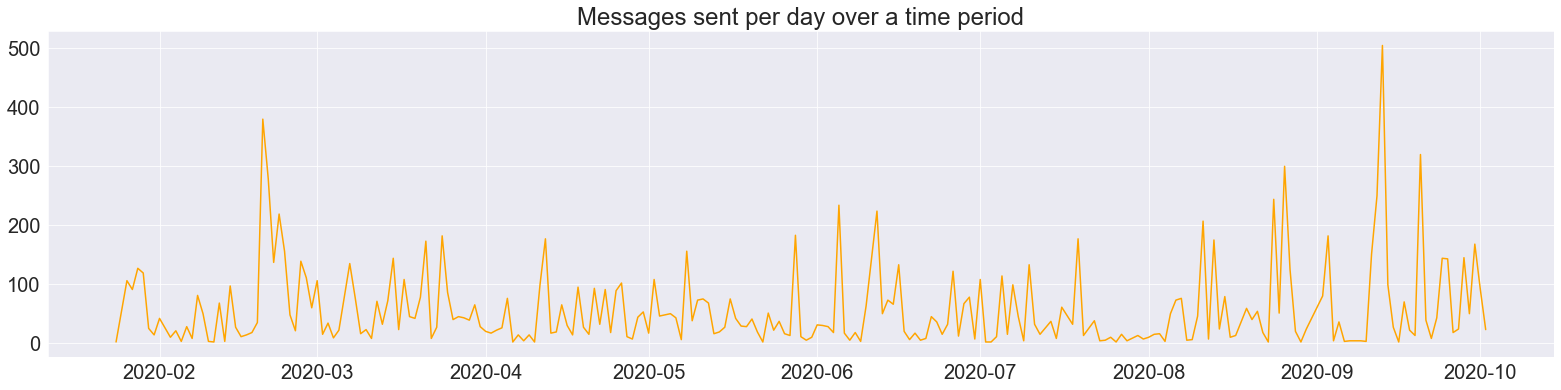

In [16]:



sns.set_style("darkgrid")

import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      #

plt.plot(df1.date, df1.message_count,color="orange")
plt.title('Messages sent per day over a time period');

plt.savefig('msg_plots.svg', format = 'svg')

#Checking the trend for last 10days


In [17]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop(columns="index", inplace=True)
top10days

,date,message_count
0,2020-09-13,504
1,2020-02-20,379
2,2020-09-20,319
3,2020-08-26,299
4,2020-02-21,278
5,2020-09-12,249
6,2020-08-24,243
7,2020-06-05,233
8,2020-06-12,223
9,2020-02-23,218


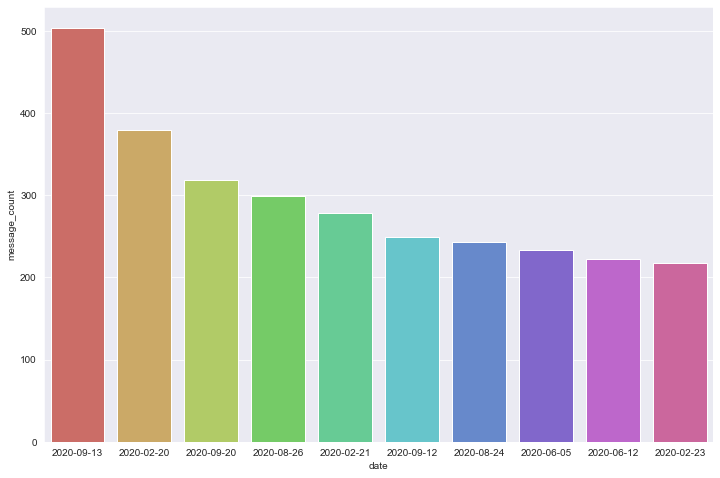

In [18]:

sns.set_style("darkgrid")

import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

sns.barplot(top10days.date, top10days.message_count, palette="hls");

plt.savefig('top10_days.svg', format = 'svg')

# Top 10 active users on the group


In [19]:

print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")
print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 154
Number of people who haven't sent even a single message on the group are 81


In [20]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)


top10df = top10df.head(10).reset_index()
top10df

,user,message
0,"Tanay Kamath (TSEC, CS)",2528
1,"Dheeraj Lalwani (TSEC, CS)",1937
2,"Darshan Rander (TSEC, IT)",1404
3,"Kartik Soneji (TSEC, CS)",841
4,"Harsh Kapadia (TSEC IT, SE)",790
5,"Pratik K (TSEC CS, SE)",781
6,"Saurav Upoor (TSEC CS, SE)",569
7,Tushar Nankani,354
8,+91 82916 21138,275
9,"Farhan Irani (TSEC IT, SE)",255


In [21]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]
top10df.initials[7] = "Me"    # That's me
top10df.initials[8] = "DT"

In [22]:

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

0    TK
1    DL
2    DR
3    KS
4    HK
5    PK
6    SU
7    Me
8    DT
9    FI
Name: initials, dtype: object

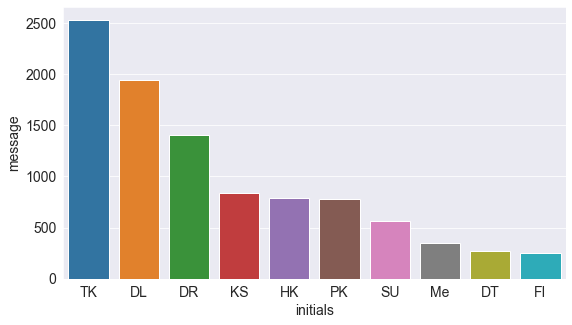

In [23]:

sns.set_style("darkgrid")
sns.barplot(top10df.initials, top10df.message, data=top10df);
top10df.initials

#Most used words in the chat


NameError: name 'wordcloud' is not defined